In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"../dataset/Salary_Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Merubah beberapa nama kolom 


In [5]:
data_new = df.rename(columns={
    'Age' : 'age',
    'Gender' : 'gender',
    'Education Level' : 'education_level',
    'Job Title' : 'job',
    'Years of Experience' : 'years_of_experience',
    'Salary' : 'salary'
})

In [6]:
# clean data column education_level
# nilai Bachelor's dan Bachelor's Degree sama
# nilai Master's dan Master's Degree sama
# data PhD dan phD sama
data_new['education_level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [7]:
# Mereplace data 
data_new['education_level'] = data_new['education_level'].replace({
    "Bachelor's Degree" : "Bachelor's",
    "Master's Degree" : "Master's",
    "PhD" : "phD"})


Cek & Handling null values dalam dataset

In [8]:
# Cek Apakah ada null values
data_new.isnull().sum()

age                    2
gender                 2
education_level        3
job                    2
years_of_experience    3
salary                 5
dtype: int64

In [9]:
data_new[data_new['age'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_new[data_new['gender'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_new[data_new['education_level'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [12]:
data_new[data_new['job'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_new[data_new['years_of_experience'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
5247,26.0,Female,Bachelor's,Social M,NaN,NaN


In [14]:
data_new[data_new['salary'].isnull()]

,age,gender,education_level,job,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,Male,Master's,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's,Social M,NaN,NaN
6455,36.0,Male,Bachelor's,Sales Director,6.0,NaN


In [15]:
# Handling Null Values
# Menghapus baris data yang memilik null values
data_new.dropna(inplace=True)
data_new

,age,gender,education_level,job,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,phD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,phD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0


Cek duplikasi dan handling duplikasi data dalam dataset

In [16]:
# Cek data duplikat
data_new.duplicated().sum()

4912

In [17]:
# Hapus data duplikat
data_new.drop_duplicates(inplace=True)

Cek outlier pada setiap kolom

In [18]:
# Cek tipe data setiap kolom
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1786 non-null   float64
 1   gender               1786 non-null   object 
 2   education_level      1786 non-null   object 
 3   job                  1786 non-null   object 
 4   years_of_experience  1786 non-null   float64
 5   salary               1786 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


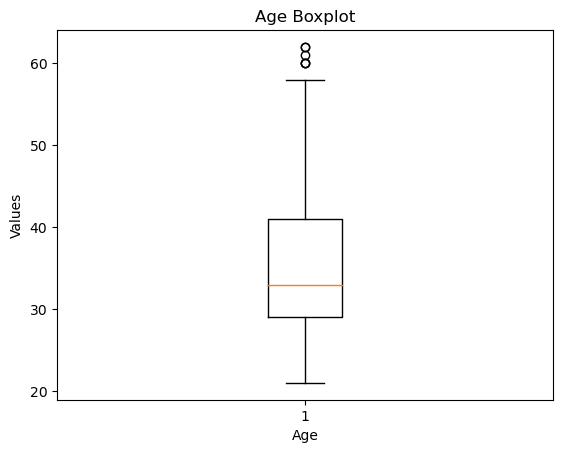

In [19]:
# cek outlier kolom age
plt.boxplot(data_new['age'],)
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

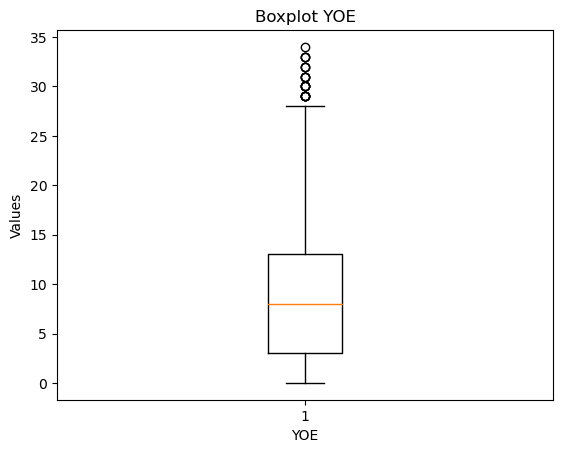

In [20]:
# Cek Outlier kolom years_of_experience
plt.boxplot(data_new['years_of_experience'])
plt.title('Boxplot YOE')
plt.xlabel('YOE')
plt.ylabel('Values')
plt.show()

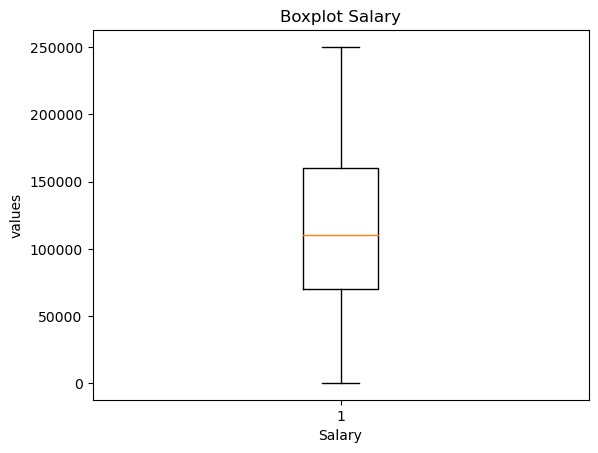

In [21]:
# Cek outlier kolom salary
plt.boxplot(data_new['salary'])
plt.title('Boxplot Salary')
plt.xlabel('Salary')
plt.ylabel('values')
plt.show()

Handling Outlier kolom years_of_experience

In [22]:
# Mencari Q1 dan Q3
Q1 = data_new['years_of_experience'].quantile(0.25)
Q3 = data_new['years_of_experience'].quantile(0.75)

# Mencari IQR(Interquartil Range)
IQR = Q3 - Q1

# Menentukan batas min dan max dalam IQR
batas_min = Q1 - 1.5 * IQR
batas_max = Q3 + 1.5 * IQR
print('batas min: ', batas_min)
print('batas max: ', batas_max)


batas min:  -12.0
batas max:  28.0


In [23]:
# Cek data outlier atas dan bawah kolom years_of_experienc
outlier_atas = []
outlier_bawah = []

for i in data_new['years_of_experience']:
    if (i < batas_min):
        outlier_bawah.append(i)
    if (i > batas_max):
        outlier_atas.append(i)

print('Outlier Atas: ',outlier_atas)
print('Outlier Bawah: ',outlier_bawah)

Outlier Atas:  [31.0, 30.0, 33.0, 33.0, 34.0, 33.0, 30.0, 29.0, 29.0, 29.0, 31.0, 31.0, 30.0, 31.0, 30.0, 29.0, 29.0, 29.0, 32.0, 32.0, 32.0, 30.0]
Outlier Bawah:  []


In [24]:
# Hapus data outlier kolom years_of_experience
yoe_clean = data_new[(data_new['years_of_experience'] >= batas_min) & (data_new['years_of_experience'] <= batas_max)]


Handling outlier kolom age

In [25]:
# Mencari Q1 dan Q3
q1 = yoe_clean['age'].quantile(0.25)
q3 = yoe_clean['age'].quantile(0.75)

# Hitung IQR
iqr = q3 - q1

# Menentukan batas atas dan bawah
batas_bawah = q1 - 1.5 * IQR
batas_atas = q3 + 1.5 * IQR

print('batas bawah: ',batas_bawah)
print('batas atas: ',batas_atas)

batas bawah:  14.0
batas atas:  56.0


In [26]:
# Cek data outlier di kolom age
outliers_atas = []
outliers_bawah = []

for i in yoe_clean['age']:
    if (i < batas_bawah):
        outliers_bawah.append(i)
    if (i > batas_atas):
        outliers_atas.append(i)

print('outliers atas: ',outliers_atas)
print('outliers bawah: ',outliers_bawah)

outliers atas:  [61.0, 57.0, 62.0, 62.0, 60.0, 57.0, 58.0, 58.0, 58.0, 57.0, 58.0]
outliers bawah:  []


In [27]:
# Hapus Outlier di kolom age
data_clean = yoe_clean[(yoe_clean['age'] >= batas_bawah) & (yoe_clean['age'] <= batas_atas)]

In [28]:
data_clean.to_excel(r'./salary-data.xlsx', index=None, header=True) 
data_clean.to_csv(r'./salary-data.csv', index=False)